In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [107]:
crop=pd.read_csv('/content/cropreccomendation.csv')
#fertilizer=pd.read_csv('/content/fertilizerrecmendation.csv')

In [108]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [109]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [110]:
crop.shape

(2200, 8)

In [111]:
crop.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [112]:
crop.duplicated().sum()

np.int64(0)

In [113]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


exploring data

In [114]:
# Check the target distribution
crop['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [115]:
features = crop.columns.to_list()
if 'label' in features: # Check if 'label' is present in the features list
  features.remove('label')
print(features)


['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


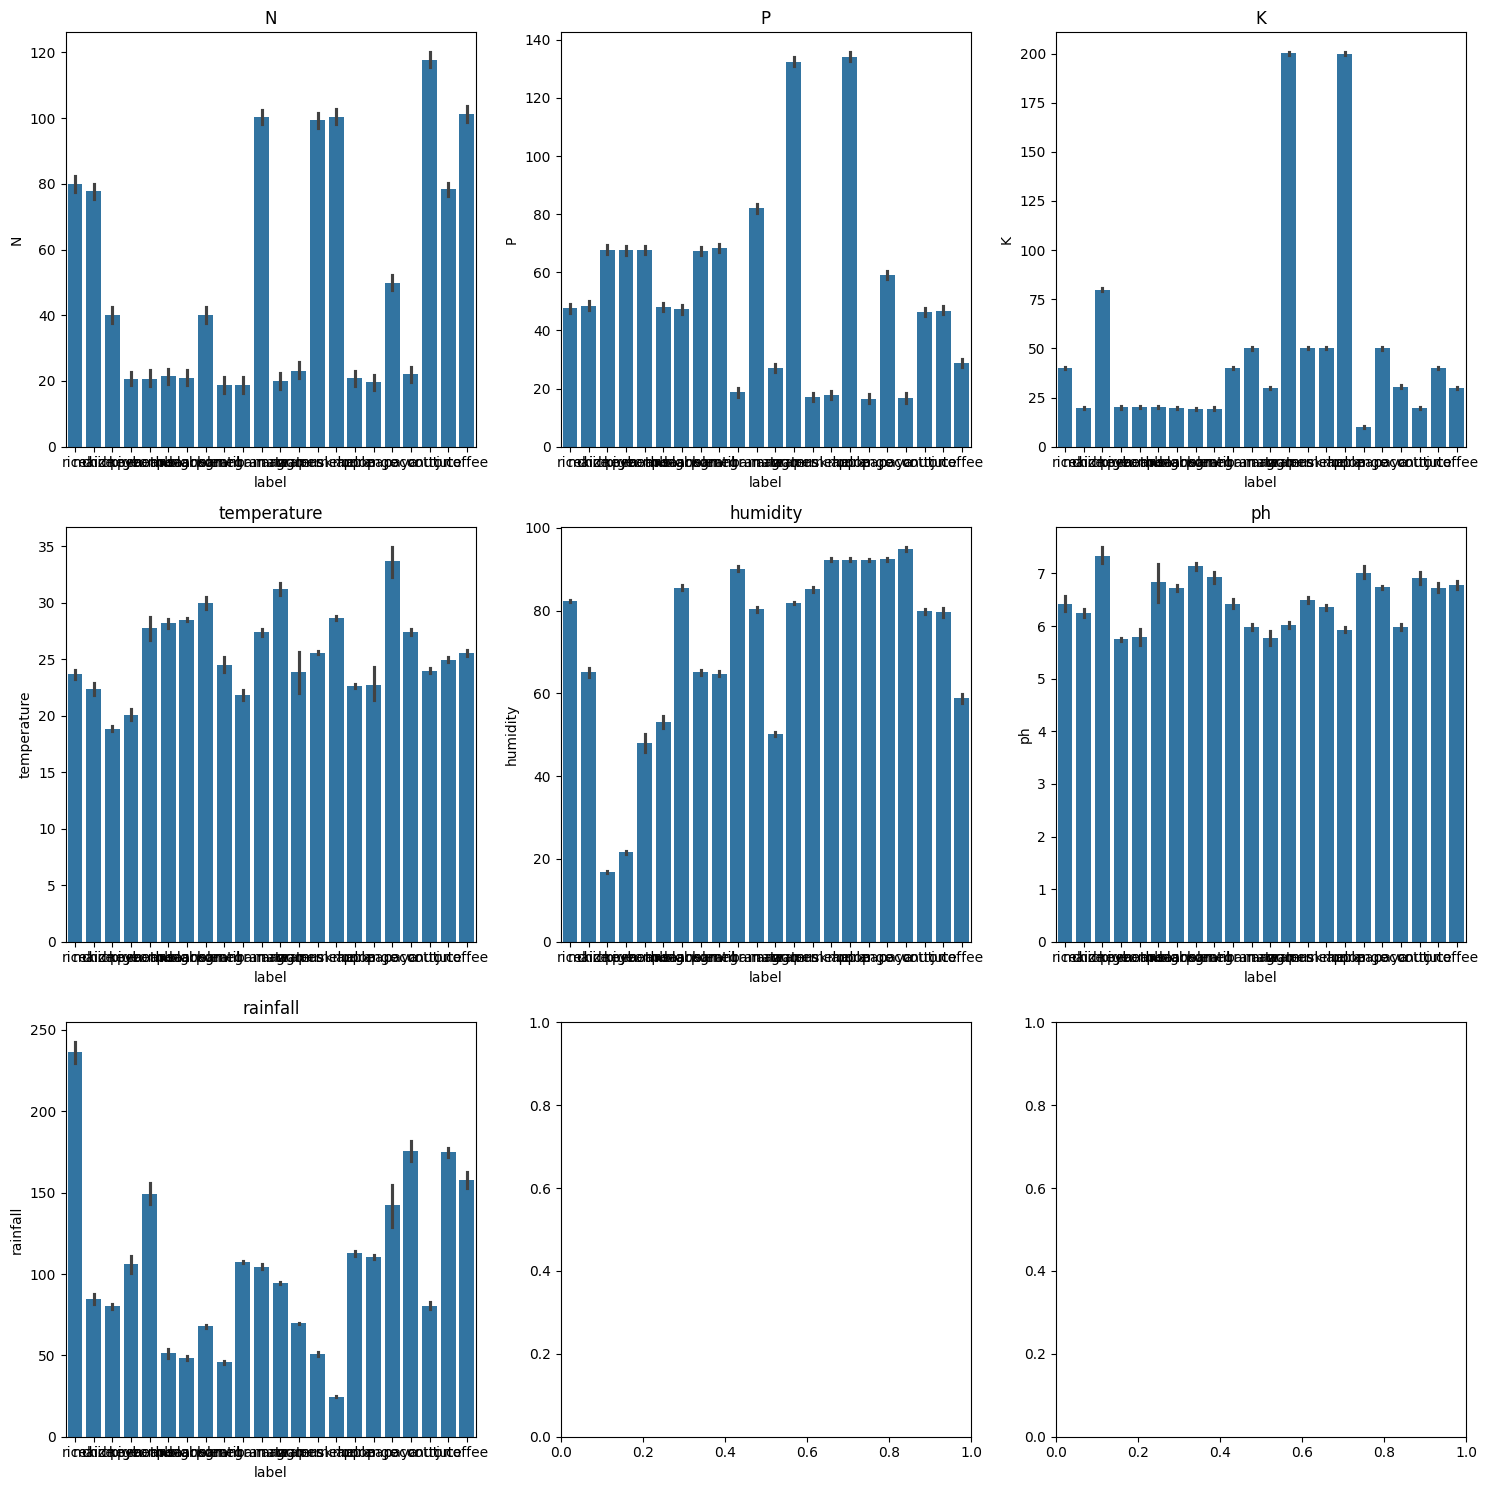

In [116]:
fig,ax=plt.subplots(3,3,figsize=(15,15))
for i, subplot in zip(features,ax.flatten()):
  sn.barplot(x='label',y=i,data=crop,ax=subplot)
  subplot.set_title(i)
plt.tight_layout()
plt.show()

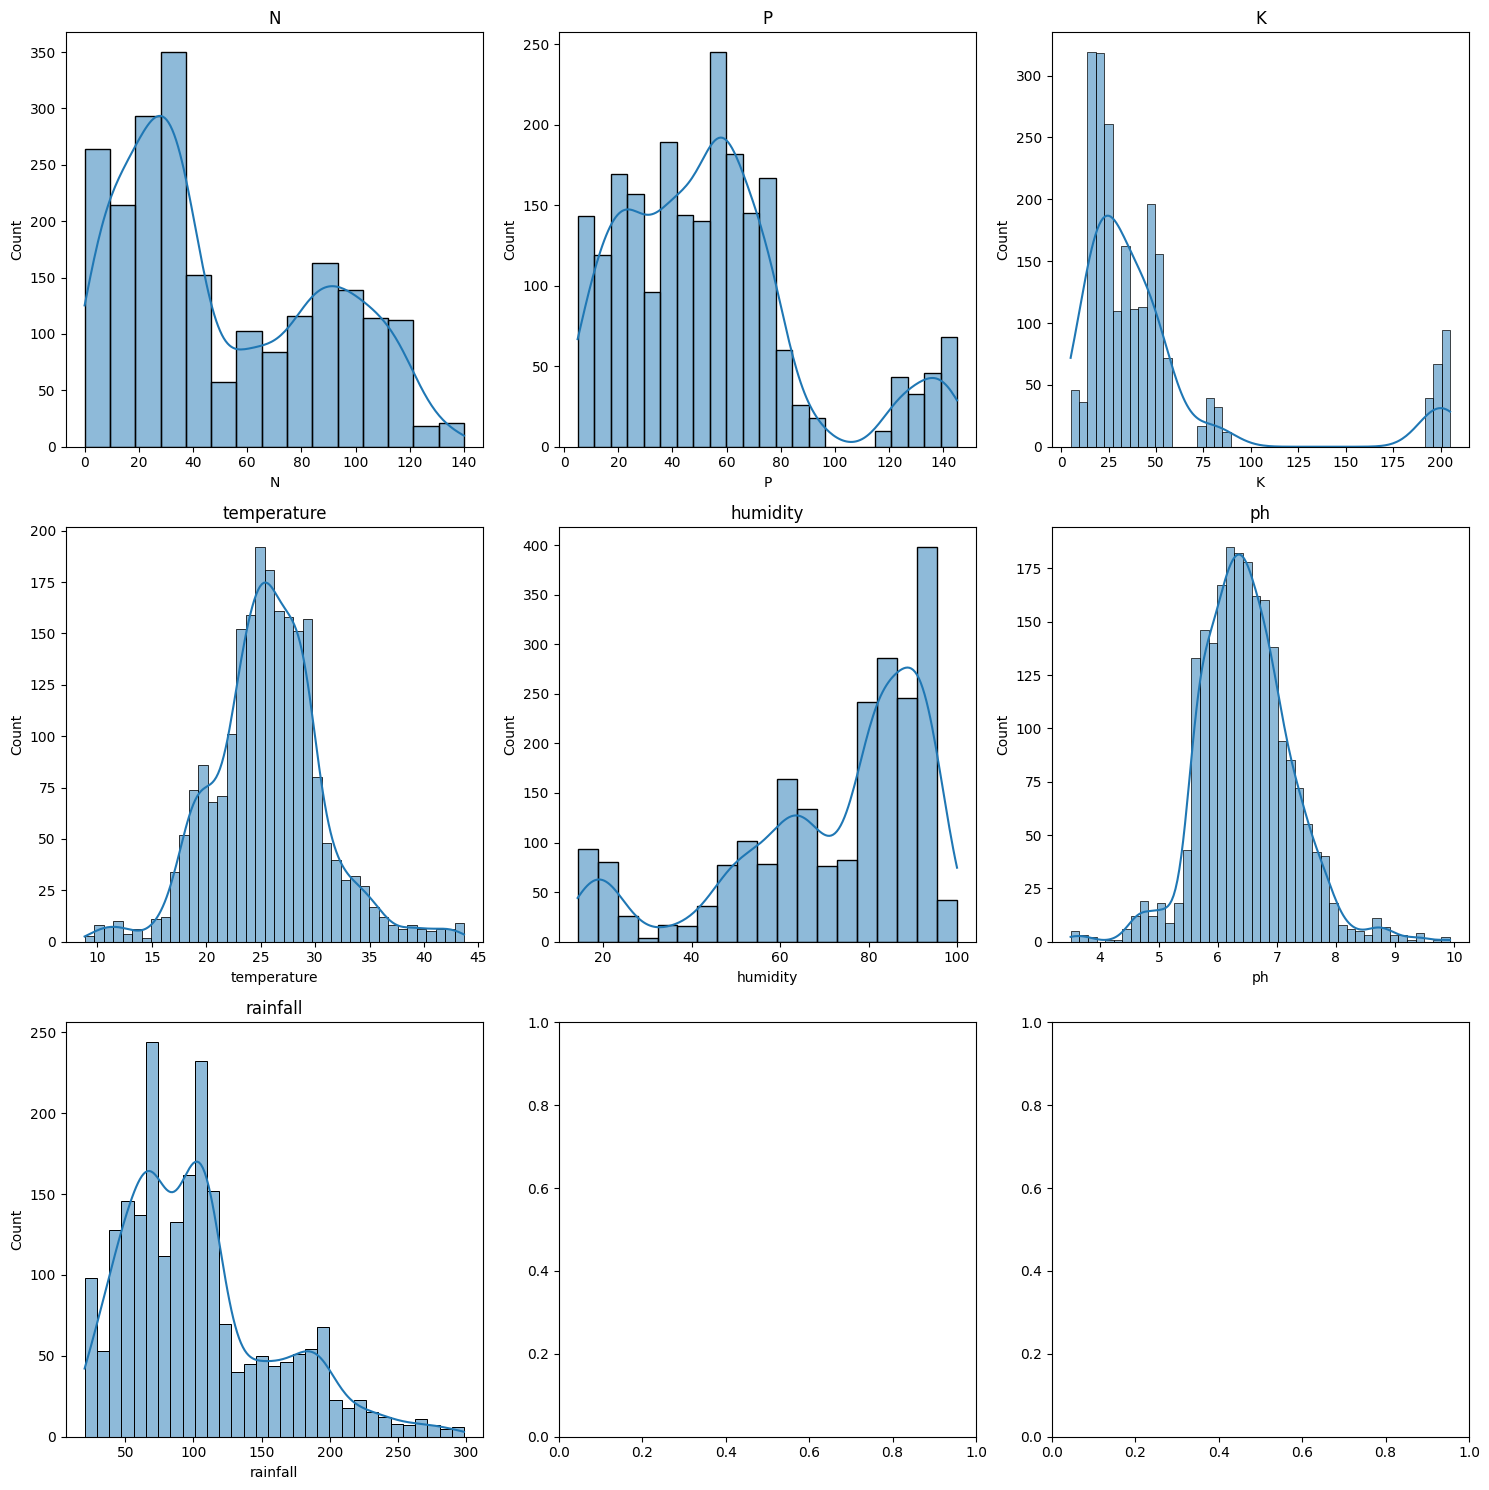

In [117]:
# visualize the distribution of each feature
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sn.histplot(crop[i], ax=subplot, kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

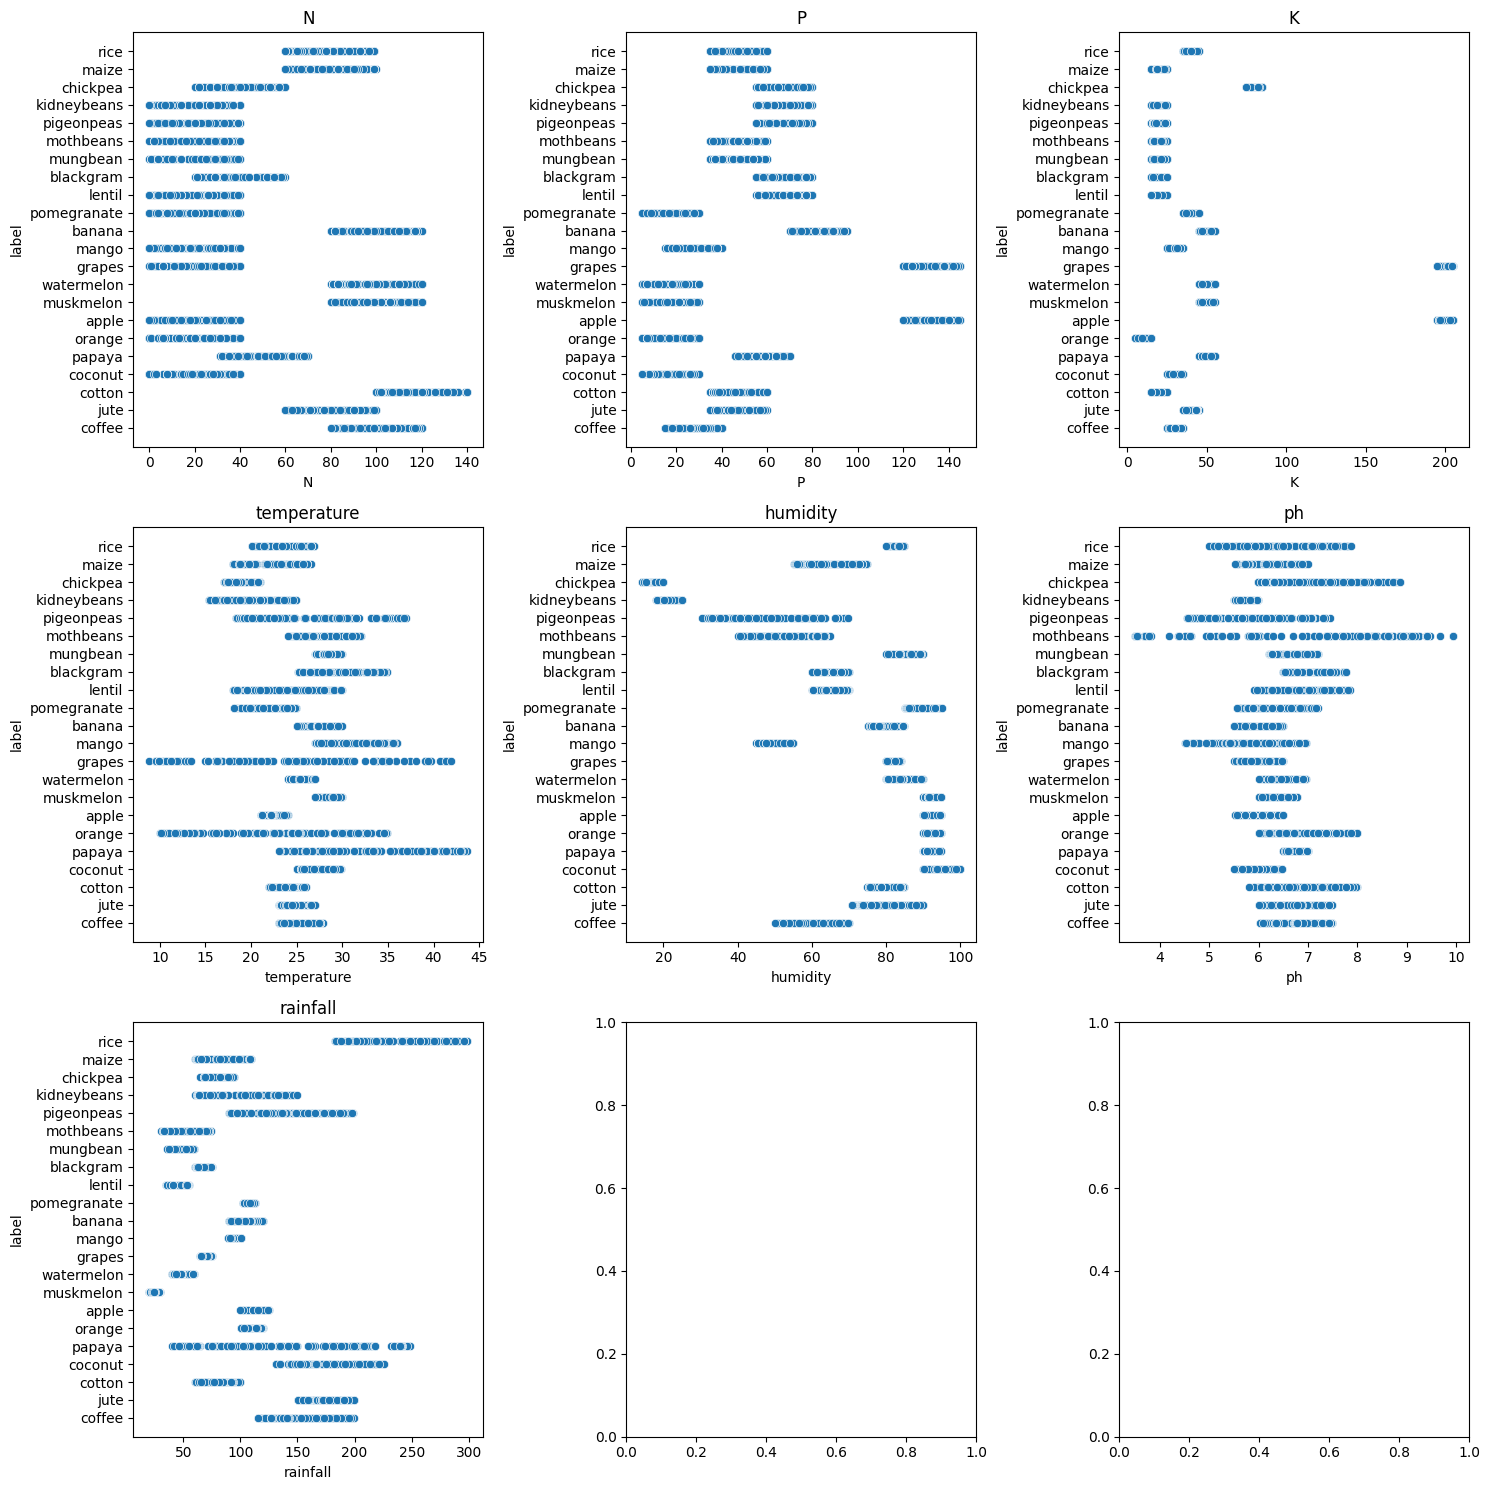

In [118]:
fig,ax=plt.subplots(3,3,figsize=(15,15))
for i, subplot in zip(features,ax.flatten()):
  sn.scatterplot(x=i,y='label',data=crop,ax=subplot)
  subplot.set_title(i)
plt.tight_layout()
plt.show()
#

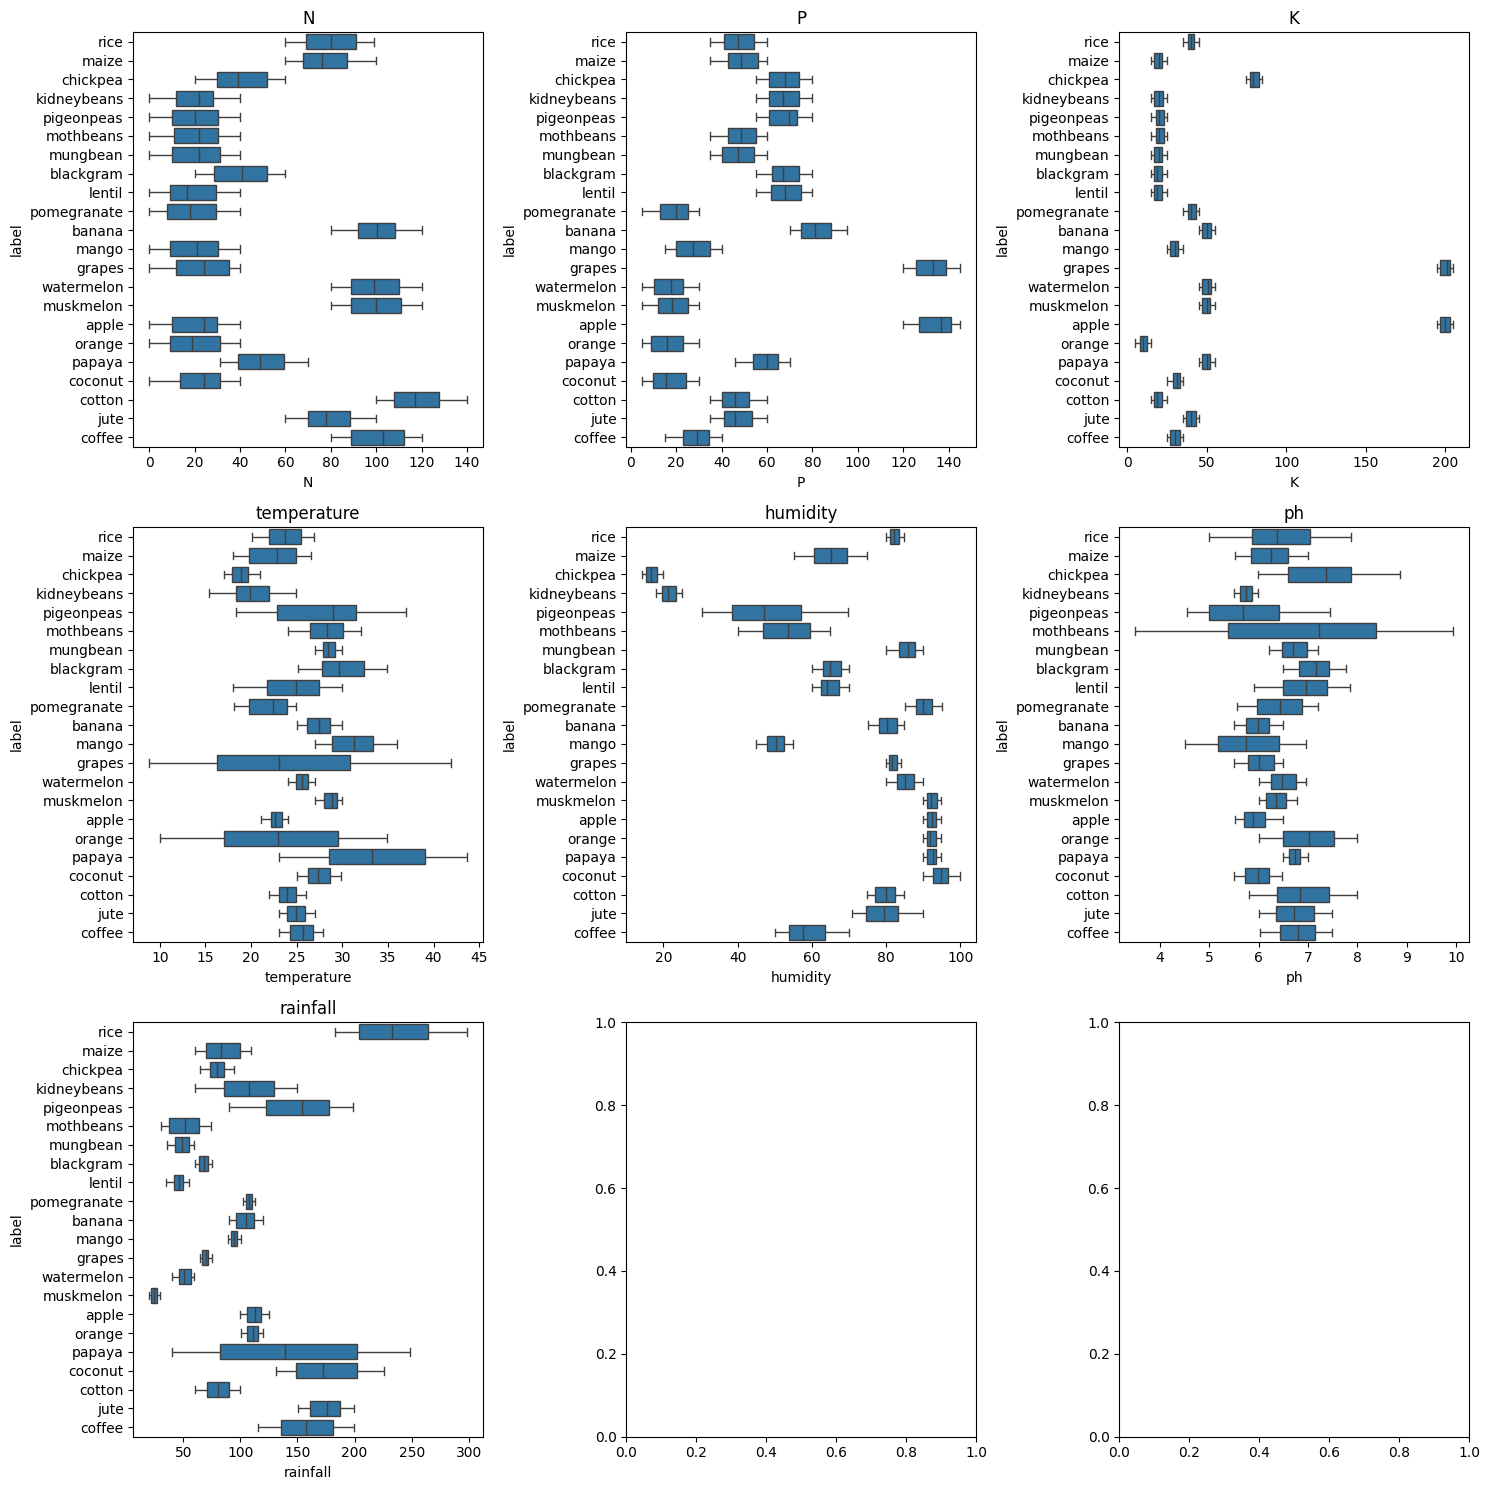

In [119]:
fig,ax=plt.subplots(3,3,figsize=(15,15))
for i, subplot in zip(features,ax.flatten()):
  sn.boxplot(x=i,y='label',data=crop,ax=subplot)
  subplot.set_title(i)
plt.tight_layout()
plt.show()

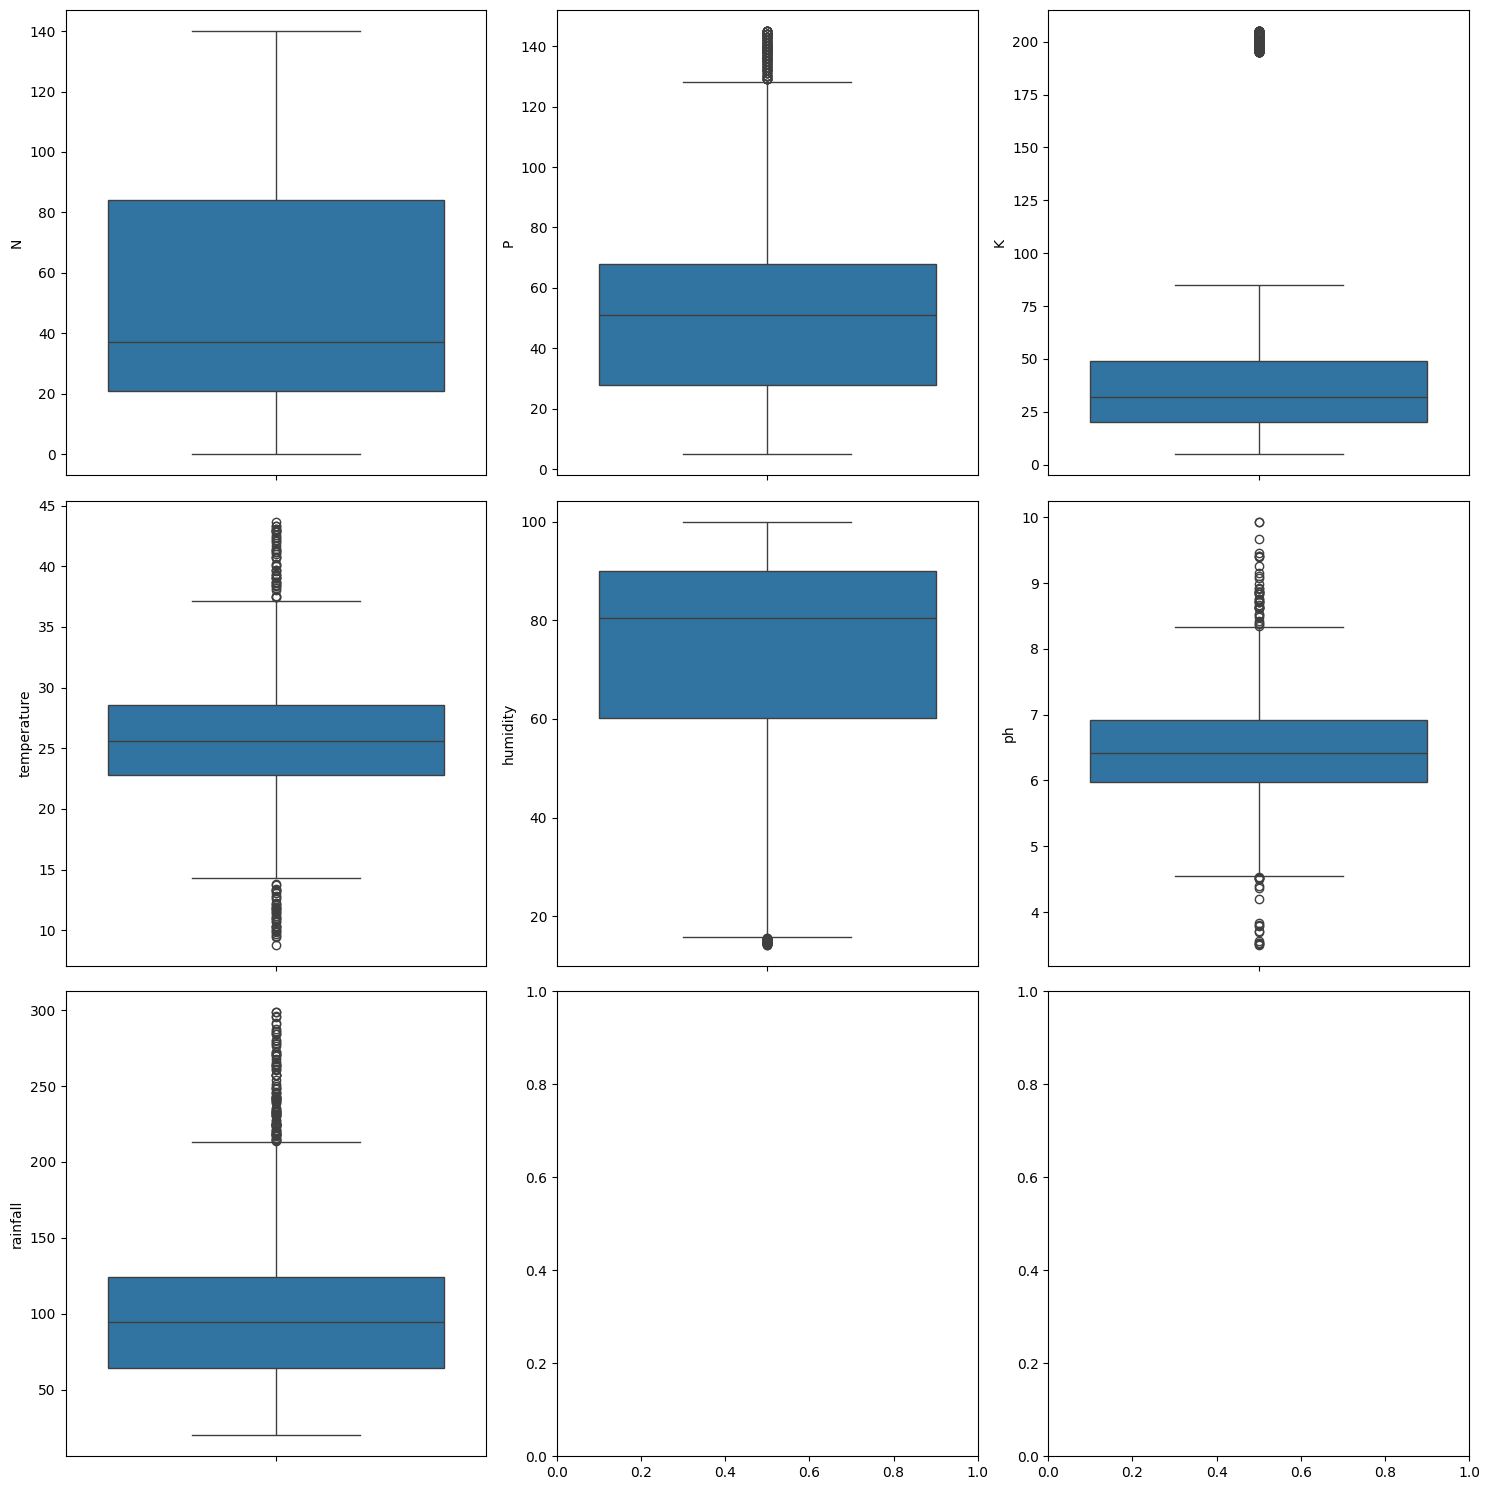

In [120]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sn.boxplot(crop[i], ax=subplot)
plt.tight_layout()
plt.show()

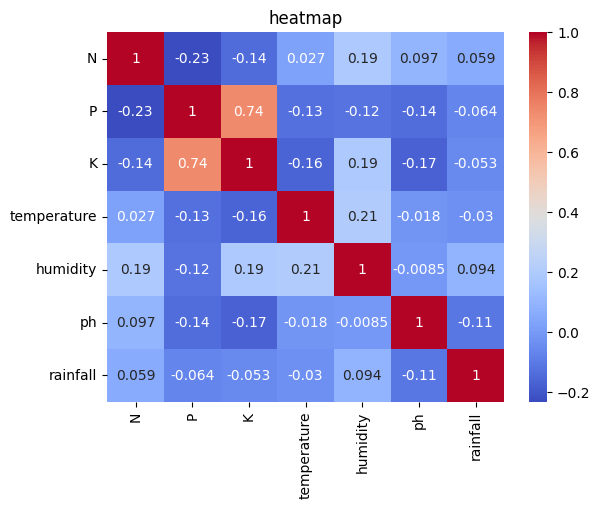

In [121]:
numeric_columns=crop.select_dtypes(include=[np.number])
corr=numeric_columns.corr()
corr
sn.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('heatmap')
plt.show()

encoding

In [122]:
cropcrop_dict = {
'rice':1,
'maize':2,
'jute':3,
'cotton':4,
'coconut':5,
'papaya':6,
'orange':7,
'apple':8,
'muskmelon':9,
'watermelon':10,
'grapes':11,
'mango':12,
'banana':13,
'pomegranate':14,
'lentil':15,
'blackgram':16,
'mungbean':17,
'mothbeans':18,
'pigeonpeas':19,
'kidneybeans':20,
'chickpea':21,
'coffee': 22,
}

In [123]:
crop


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [124]:
crop_dict

{'rice': 0,
 'maize': 1,
 'chickpea': 2,
 'kidneybeans': 3,
 'pigeonpeas': 4,
 'mothbeans': 5,
 'mungbean': 6,
 'grapes': 12,
 'watermelon': 13,
 'blackgram': 7,
 'lentil': 8,
 'pomegranate': 9,
 'banana': 10,
 'mango': 11,
 'muskmelon': 14,
 'apple': 15,
 'orange': 16,
 'papaya': 17,
 'coconut': 18,
 'cotton': 19,
 'jute': 20,
 'coffee': 21}

In [125]:
crop['crop_no'] = crop['label'].map(crop_dict)
crop

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,21


In [126]:
crop['crop_no'].value_counts()

,count
crop_no,
0,100
1,100
2,100
3,100
4,100
5,100
6,100
7,100
8,100


In [127]:
crop.drop('label',axis=1,inplace=True)
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,21
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,21


train test split

In [128]:
x=crop.drop('crop_no',axis=1)
y=crop['crop_no']
print("the shape of x is",x.shape)
print("the shape of y is",y.shape)

the shape of x is (2200, 7)
the shape of y is (2200,)


In [129]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [130]:
print("the shape of x_train is",x_train.shape)
print("the shape of x_test is",x_test.shape)
print("the shape of y_train is",y_train.shape)
print("the shape of y_test is",y_test.shape)

the shape of x_train is (1760, 7)
the shape of x_test is (440, 7)
the shape of y_train is (1760,)
the shape of y_test is (440,)


scaling